#**Aula 1: Realizando as primeiras consultas**

##**Conhecendo os dados**

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/llamaIndex_pandas_query/refs/heads/main/Dados/vendas.csv'

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

ID_compra filial       cidade tipo_cliente     genero       tipo_produto  \
0  750-67-8428      A  Santo André       Membro   Feminino     Saúde e Beleza   
1  226-31-3081      C  São Caetano       Normal   Feminino        Eletrônicos   
2  631-41-3108      A  Santo André       Normal  Masculino               Casa   
3  123-19-1176      A  Santo André       Membro  Masculino     Saúde e Beleza   
4  373-73-7910      A  Santo André       Normal  Masculino  Esportes e Viagem   

   preco_unitario  quantidade  imposto_5%     total        data      hora  \
0           74.69           7     26.1415  548.9715  2024-01-05  13:08:00   
1           15.28           5      3.8200   80.2200  2024-03-08  10:29:00   
2           46.33           7     16.2155  340.5255  2024-03-03  13:23:00   
3           58.22           8     23.2880  489.0480  2024-01-27  20:33:00   
4           86.31           7     30.2085  634.3785  2024-02-08  10:37:00   

     forma_pagamento  avaliacao  
0   Carteira Digital        9.1  
1           Dinheiro        9.6  
2  Cartão de Crédito        7.4  
3   Carteira Digital        8.4  
4   Carteira Digital        5.3

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_compra        1000 non-null   object 
 1   filial           1000 non-null   object 
 2   cidade           1000 non-null   object 
 3   tipo_cliente     1000 non-null   object 
 4   genero           1000 non-null   object 
 5   tipo_produto     1000 non-null   object 
 6   preco_unitario   1000 non-null   float64
 7   quantidade       1000 non-null   int64  
 8   imposto_5%       1000 non-null   float64
 9   total            1000 non-null   float64
 10  data             1000 non-null   object 
 11  hora             1000 non-null   object 
 12  forma_pagamento  1000 non-null   object 
 13  avaliacao        1000 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 109.5+ KB


In [ ]:
df.duplicated().sum()

0

##**Definindo a LLM e configurando a Chave de API**

In [ ]:
!pip install llama-index llama-index-experimental -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.8/176.8 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.6/187.6 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.7/248.7 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.6/254.6 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/

In [ ]:
from google.colab import userdata
key = userdata.get('GROQ_API')

In [ ]:
!pip install llama-index-llms-groq -q

In [ ]:
from llama_index.core import Settings
from llama_index.llms.groq import Groq

Settings.llm = Groq(model='llama3-70b-8192', api_key=key)

##**Gerando consultas com PandasQueryEngine**

In [ ]:
from llama_index.experimental.query_engine import PandasQueryEngine

In [ ]:
query_engine = PandasQueryEngine(df=df, verbose=True)

In [ ]:
response = query_engine.query('Qual é a forma de pagamento mais utilizada pelos clientes?')

> Pandas Instructions:
```
df.forma_pagamento.value_counts().index[0]
```
> Pandas Output: Carteira Digital


In [ ]:
df.forma_pagamento.value_counts()

forma_pagamento
Carteira Digital     345
Dinheiro             344
Cartão de Crédito    311
Name: count, dtype: int64

In [ ]:
response = query_engine.query('Qual é o tipo de produto com maior quantidade por filial?')

> Pandas Instructions:
```
df.groupby(['filial', 'tipo_produto'])['quantidade'].sum().groupby('filial').idxmax()
```
> Pandas Output: filial
A                   (A, Casa)
B      (B, Esportes e Viagem)
C    (C, Alimentos e Bebidas)
Name: quantidade, dtype: object


In [ ]:
df.groupby(['filial', 'tipo_produto'])['quantidade'].sum()

filial  tipo_produto       
A       Alimentos e Bebidas    313
        Casa                   371
        Eletrônicos            322
        Esportes e Viagem      333
        Moda                   263
        Saúde e Beleza         257
B       Alimentos e Bebidas    270
        Casa                   295
        Eletrônicos            316
        Esportes e Viagem      322
        Moda                   297
        Saúde e Beleza         320
C       Alimentos e Bebidas    369
        Casa                   245
        Eletrônicos            333
        Esportes e Viagem      265
        Moda                   342
        Saúde e Beleza         277
Name: quantidade, dtype: int64

In [ ]:
response

Response(response='filial\nA                   (A, Casa)\nB      (B, Esportes e Viagem)\nC    (C, Alimentos e Bebidas)\nName: quantidade, dtype: object', source_nodes=[], metadata={'pandas_instruction_str': "df.groupby(['filial', 'tipo_produto'])['quantidade'].sum().groupby('filial').idxmax()", 'raw_pandas_output': 'filial\nA                   (A, Casa)\nB      (B, Esportes e Viagem)\nC    (C, Alimentos e Bebidas)\nName: quantidade, dtype: object'})

In [ ]:
print(response.response)

filial
A                   (A, Casa)
B      (B, Esportes e Viagem)
C    (C, Alimentos e Bebidas)
Name: quantidade, dtype: object


#**Aula 2: Realizando consultas e customizando saídas**

##**Obtendo respostas com explicações**

In [ ]:
query_engine = PandasQueryEngine(df=df, verbose=True, synthesize_response=True)

In [ ]:
response = query_engine.query('Qual é a avaliação média de cada filial?')
print(str(response))

> Pandas Instructions:
```
df.groupby('filial')['avaliacao'].mean()
```
> Pandas Output: filial
A    7.027059
B    6.818072
C    7.072866
Name: avaliacao, dtype: float64
A avaliação média de cada filial é a seguinte: a filial A tem uma avaliação média de 7.03, a filial B tem uma avaliação média de 6.82 e a filial C tem uma avaliação média de 7.07.


In [ ]:
df.groupby('filial')['avaliacao'].mean()

filial
A    7.027059
B    6.818072
C    7.072866
Name: avaliacao, dtype: float64

In [ ]:
response.response

'A avaliação média de cada filial é a seguinte: a filial A tem uma avaliação média de 7.03, a filial B tem uma avaliação média de 6.82 e a filial C tem uma avaliação média de 7.07.'

In [ ]:
import textwrap

def formatar_texto(response):
  texto = response.response
  texto_formatado = textwrap.fill(texto, width=100)
  print(texto_formatado)

In [ ]:
formatar_texto(response)

A avaliação média de cada filial é a seguinte: a filial A tem uma avaliação média de 7.03, a filial
B tem uma avaliação média de 6.82 e a filial C tem uma avaliação média de 7.07.


##**Obtendo gráficos**

In [ ]:
response = query_engine.query('Você pode exibir a distribuição das avaliações?')

> Pandas Instructions:
```
df.avaliacao.value_counts()
```
> Pandas Output: avaliacao
6.0     26
6.6     24
4.2     22
9.5     22
6.5     21
        ..
4.0     11
5.3     11
8.3     11
4.6      8
10.0     5
Name: count, Length: 61, dtype: int64


In [ ]:
formatar_texto(response)

Sim, a distribuição das avaliações é a seguinte: a avaliação mais comum é 6.0, com 26 ocorrências,
seguida de 6.6 com 24 ocorrências, 4.2 com 22 ocorrências, e assim por diante. Existem 61 avaliações
únicas no conjunto de dados, com a menor frequência sendo 5, correspondente à avaliação 10.0.


> Pandas Instructions:
```
df.avaliacao.plot(kind='hist')
```
> Pandas Output: Axes(0.125,0.11;0.775x0.77)


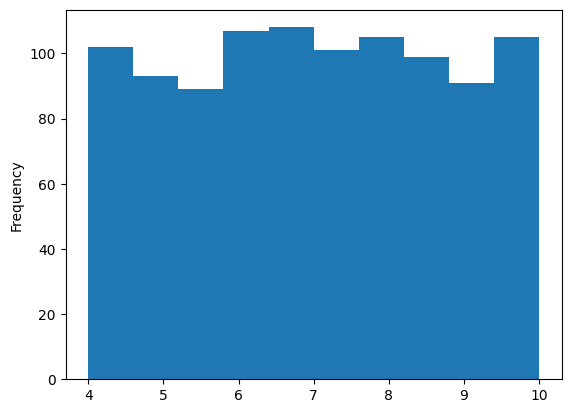

In [ ]:
response = query_engine.query('Você pode plotar a distribuição das avaliações?')

In [ ]:
formatar_texto(response)

Sim, é possível plotar a distribuição das avaliações. Utilizando a biblioteca Pandas, podemos criar
um histograma das avaliações com o comando `df.avaliacao.plot(kind='hist')`. Isso irá gerar um
gráfico que mostra a frequência de cada avaliação, permitindo visualizar a distribuição das
avaliações.


> Pandas Instructions:
```
df.groupby('tipo_produto')['total'].sum().sort_values().plot(kind='barh')
```
> Pandas Output: Axes(0.125,0.11;0.775x0.77)


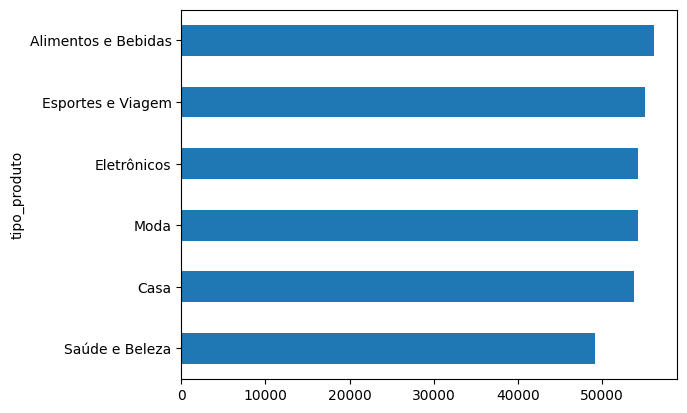

In [ ]:
response = query_engine.query('''Você pode plotar o valor total por tipo de produto,
ordenando do menor para o maior e mantendo as barras na horizontal?''')

In [ ]:
formatar_texto(response)

Sim, é possível plotar o valor total por tipo de produto, ordenando do menor para o maior e mantendo
as barras na horizontal. Para fazer isso, você pode utilizar o seguinte código em Pandas:
`df.groupby('tipo_produto')['total'].sum().sort_values().plot(kind='barh')`  Isso irá agrupar os
dados por tipo de produto, somar os valores totais para cada grupo, ordenar os resultados do menor
para o maior e, finalmente, plotar um gráfico de barras horizontal com os resultados. O gráfico
resultante mostrará os tipos de produtos no eixo y e os valores totais no eixo x, com as barras
ordenadas do menor para o maior.


> Pandas Instructions:
```
df.groupby('tipo_produto')['total'].sum().sort_values().plot(kind='barh')
```
> Pandas Output: Axes(0.125,0.11;0.775x0.77)


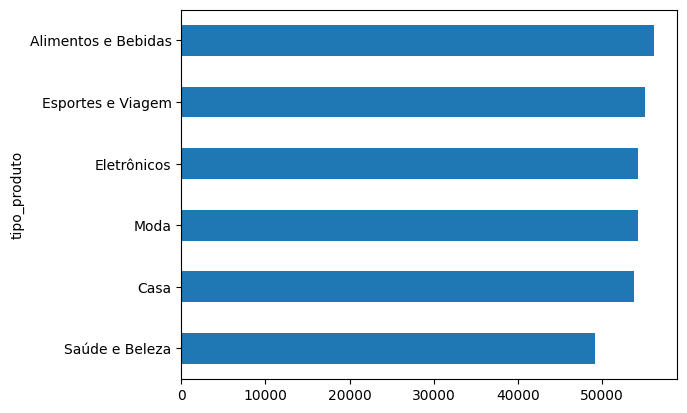

In [ ]:
response = query_engine.query('''Plote o valor total por tipo de produto,
ordenando do menor para o maior e mantendo as barras na horizontal''')

In [ ]:
formatar_texto(response)

Here is a synthesized response based on the query results:  "The total value by product type has
been plotted in a horizontal bar chart, with the values sorted from smallest to largest. The chart
shows the distribution of total values across different product types, providing a clear visual
representation of the data. The horizontal orientation of the bars makes it easy to compare the
values across different product types."


##**Direcionando o idioma das respostas**

In [ ]:
response = query_engine.query('Qual é o método de pagamento mais utilizado em cada filial?')
print(response.response)

> Pandas Instructions:
```
df.groupby('filial')['forma_pagamento'].value_counts().groupby('filial').idxmax()
```
> Pandas Output: filial
A    (A, Carteira Digital)
B    (B, Carteira Digital)
C            (C, Dinheiro)
Name: count, dtype: object
Based on the query results, the most commonly used payment method in each branch is:

* In branch A, the most commonly used payment method is Carteira Digital.
* In branch B, the most commonly used payment method is also Carteira Digital.
* In branch C, the most commonly used payment method is Dinheiro (cash).


In [ ]:
response = query_engine.query('Qual é o método de pagamento mais utilizado em cada filial? Responda em português BR')
print(response.response)

> Pandas Instructions:
```
df.groupby('filial')['forma_pagamento'].value_counts().groupby('filial').idxmax()
```
> Pandas Output: filial
A    (A, Carteira Digital)
B    (B, Carteira Digital)
C            (C, Dinheiro)
Name: count, dtype: object
O método de pagamento mais utilizado em cada filial é:

* Na filial A, o método mais utilizado é a Carteira Digital.
* Na filial B, o método mais utilizado é a Carteira Digital.
* Na filial C, o método mais utilizado é o pagamento em Dinheiro.


In [ ]:
df.groupby('filial')['forma_pagamento'].value_counts()

filial  forma_pagamento  
A       Carteira Digital     126
        Dinheiro             110
        Cartão de Crédito    104
B       Carteira Digital     113
        Dinheiro             110
        Cartão de Crédito    109
C       Dinheiro             124
        Carteira Digital     106
        Cartão de Crédito     98
Name: count, dtype: int64